# Using NetCDF files

The `data_samples/netcdf/E-OBS` contains data from the E-OBS dataset, which consist in weather station observations interpolated onto a 0.25x0.25° grid over Europe. 

## 1. Explore and manipulate the data in bash/terminal

Before we actually use Python, we are going to learn how to manipulate NetCDF files using the terminal. You can do the following exercises either switching to the terminal, or you can run shell commands by writing `!command` in a Jupyter Notebook cell. 

In [1]:
# Example of running shell commands in Jupyter: Display the content of you home
!ls ~

Desktop             Library             Pictures            Zotero
Documents           Movies              Public              slp?.png
Downloads           Music               Softs
Huracan             OneDrive - Nexus365 Teaching


In [2]:
# Task: Display the list of files available in the data folder
!ls ../data_samples/netcdf/E-OBS/

daily                             rr_ens_mean_0.25deg_reg_v29.0e.nc
pp_ens_mean_0.25deg_reg_v29.0e.nc tg_ens_mean_0.25deg_reg_v29.0e.nc


Files with extension `.nc` are "NetCDF" files. It is a standardized binary format suitable for multi-dimensional data. Binary files cannot be read as easily as the text files you have seen previously (you can try to run `head file.nc`, it will yield something, but nothing you can read with a human brain). You need specific tools to read this type of files. 

### 1.1. ncdump
`ncdump` is the most basic command to check what is in a NetCDF file. Use the `-h` or `-c` option to display the "header" of the file, which contains all the essential information. Use the `-v <var>` option to display the content of a specific variable. If you do not specify any option, the whole content of the file is displayed, which, in most cases, will be very long. If you make this mistake, you'll likely need to kill the process (Ctrl+C in the terminal, Stop button in Jupyter). 

In [3]:
# Task: Display the header of one of the file in the E-OBS folder
!ncdump -h ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc

netcdf tg_ens_mean_0.25deg_reg_v29.0e {
dimensions:
	time = UNLIMITED ; // (888 currently)
	bnds = 2 ;
	longitude = 464 ;
	latitude = 201 ;
variables:
	int time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time in days" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1950-01-01 00:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	double longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "Longitude values" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	double latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "Latitude values" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float tg(time, latitude, longitude) ;
		tg:standard_name = "air_temperature" ;
		tg:long_name = "mean temperature" ;
		tg:units = "Celsius" ;
		tg:_FillValue = -9999.f ;
		tg:missing_value = -9999.f ;
		tg:cell_methods = "time: mean" ;

// global at

**Question: Which variable does each file contain? What are the associated units? What are the dimensions of the variables?**

**Question: What is the difference between using the `-c` and `-h` commands?**

In [4]:
# Task: Display the latitude and longitude variables for one of the file in the E-OBS folder
!ncdump -v latitude ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc
!ncdump -v longitude ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc

netcdf tg_ens_mean_0.25deg_reg_v29.0e {
dimensions:
	time = UNLIMITED ; // (888 currently)
	bnds = 2 ;
	longitude = 464 ;
	latitude = 201 ;
variables:
	int time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time in days" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1950-01-01 00:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	double longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "Longitude values" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	double latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "Latitude values" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float tg(time, latitude, longitude) ;
		tg:standard_name = "air_temperature" ;
		tg:long_name = "mean temperature" ;
		tg:units = "Celsius" ;
		tg:_FillValue = -9999.f ;
		tg:missing_value = -9999.f ;
		tg:cell_methods = "time: mean" ;

// global at

**Question: Over which coordinate box is the data provided?**

### 1.2 ncview
`ncview` is a graphical tool to check the content of a NetCDF file. When you run `ncview file.nc` a new window opens with a graphical interface.

In [5]:
# Task: Run ncview for one of the E-OBS file, and watch how the variable changes over time. (You may need to click on the variable name to display it)
# NB: To get back control over your terminal or notebook, close the window. 
!ncview ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc

Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

Note: no Ncview app-defaults file found, using internal defaults
X connection to /private/tmp/com.apple.launchd.WATKgwVKI5/org.xquartz:0 broken (explicit kill or server shutdown).


**Question: What is the range of values that the variable you observed takes? Does it seem sensible?**

**Question: Over which range of dates is the data provided? What is the frequency of the data**

### 1.3 nco

`nco` provides a suite of commands that can be used to manipulate NetCDF files. Here we introduce the most common ones. You may find all the functions <HERE> for future reference.

* `ncks` (NetCDF kitchen sink) is used to subset from NetCDF file.
* `ncrcat` is used to concatenate files along time dimension.
* `ncra` is used to average variables over time.

Command line tools require the creation of intermediary files, that we will save in the `tmp` folder.

In [6]:
# Task: Extract Temperature over your favourite European country (You must define a longitude and latitude box around the country)
# NB: This can take a few seconds
!ncks -d latitude,42.5,51.0 -d longitude,-4.7,7.8 ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc tmp/T_France.nc

ERROR: nco__create() unable to create file "tmp/T_France.nc.pid54276.ncks.tmp"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__create()
nco_err_exit(): ERROR Error code is 13. Translation into English with nc_strerror(13) is "Permission denied"
nco_err_exit(): ERROR NCO will now exit with system call exit(EXIT_FAILURE)


In [7]:
# Task: Explore the content of your new file with ncdump and ncview
# Remark the longitude and latitude dimensions are smaller than before, and check than you can see the country you wanted to.
!ncdump -h tmp/T_France.nc
!ncview tmp/T_France.nc

ncdump: tmp/T_France.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/T_France.nc : No such file or directory


In [8]:
# Task: Compute the average temperature over this selected area
!ncra tmp/T_France.nc tmp/T_France_ncra.nc

ncra: ERROR file "tmp/T_France.nc" not found. It does not exist on the local filesystem, nor does it match remote filename patterns (e.g., http://foo or foo.bar.edu:file).
ncra: HINT file-not-found errors usually arise from filename typos, incorrect paths, missing files, or capricious gods. Please verify spelling and location of requested file. If the file resides on a High Performance Storage System (HPSS) accessible via the 'hsi' command, then add the --hpss option and re-try command.


In [9]:
# Task: Explore the content of your new file with ncdump and ncview
# Remark the time dimension has been reduced to 1.
!ncdump -h tmp/T_France_ncra.nc
!ncview tmp/T_France_ncra.nc

ncdump: tmp/T_France_ncra.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/T_France_ncra.nc : No such file or directory


**Question: What is the average temperature over your country of interest?**

### 1.4 cdo
`cdo` is another suite of command line tools to manipulate NetCDF files. It is more comprehensive than `nco`, but, as such, also less simple. A comprehensive documentation can be found here: http://www.idris.fr/media/ada/cdo.pdf . 
Here again, we introduce basic cdo functions. 

In [10]:
# Task: Check the dimensions of a file using cdo sinfo
!cdo sinfo ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc

   File format : NetCDF4 zip
    -1 : Institut Source   T Steptype Levels Num    Points Num Dtype : Parameter ID
     1 : unknown  unknown  v instant       1   1     93264   1  F32z : -1            
   Grid coordinates :
     1 : lonlat                   : points=93264 (464x201)
                        longitude : -40.375 to 75.375 by 0.25 degrees_east
                         latitude : 25.375 to 75.375 by 0.25 degrees_north
   Vertical coordinates :
     1 : surface                  : levels=1
   Time coordinate :
                             time : 888 steps
     RefTime =  1950-01-01 00:00:00  Units = days  Calendar = standard  Bounds = true
  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss
  1950-01-16 00:00:00  1950-02-14 00:00:00  1950-03-16 00:00:00  1950-04-15 00:00:00
  1950-05-16 00:00:00  1950-06-15 00:00:00  1950-07-16 00:00:00  1950-08-16 00:00:00
  1950-09-15 00:00:00  1950-10-16 00:00:00  1950-11-15 00:00:00  1950-12-16 00:00:00
  1951

In [11]:
# Task: Check the variables contained in a file using cdo showname
!cdo showname ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc

 tg
cdo    showname: Processed 1 variable [0.04s 38MB]


In [12]:
# Task: Select the same box as before with cdo sellonlatbox
!cdo sellonlatbox,-4.7,7.8,42.5,51.0 ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc tmp/T_France.nc


cdi  error (cdf__create): tmp/T_France.nc: Permission denied


In [13]:
# Task: Explore the content of your new file with ncdump and ncview
# Remark the longitude and latitude dimensions are smaller than before, and check than you can see the country you wanted to.
!ncdump -h tmp/T_France.nc
!ncview tmp/T_France.nc

ncdump: tmp/T_France.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/T_France.nc : No such file or directory


In [14]:
# Task: Compute the average temperature over your box with cdo fldmean
!cdo fldmean tmp/T_France.nc tmp/T_France_fldmean.nc

cdo    fldmean: Open failed on >tmp/T_France.nc<
                No such file or directory


In [15]:
# Task: Explore the content of your new file with ncdump and ncview
# Remark the longitude and latitude dimension have shrinked to 1. ncview now displays a time series since the data became one-dimensional.
!ncdump -h tmp/T_France_fldmean.nc
!ncview tmp/T_France_fldmean.nc

ncdump: tmp/T_France_fldmean.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/T_France_fldmean.nc : No such file or directory


**Question: Can you see an increase in monthly temperature over the 1950-2023 period in your region?**

In [16]:
# Task: average the temperature time series using cdo yearmean
!cdo yearmean tmp/T_France_fldmean.nc tmp/T_France_fldmean_yearmean.nc

cdo    yearmean: Open failed on >tmp/T_France_fldmean.nc<
                 No such file or directory


In [17]:
# Task: Explore the content of your new file with ncdump and ncview
# Remark the time dimension now shows 74 time steps for the 74 years of the dataset.
!ncdump -h tmp/T_France_fldmean_yearmean.nc
!ncview tmp/T_France_fldmean_yearmean.nc

ncdump: tmp/T_France_fldmean_yearmean.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/T_France_fldmean_yearmean.nc : No such file or directory


**Question: Can you see an increase in yearly temperature over the 1950-2023 period in your region?**

`cdo` commands can be chained, but make sure to use the dashes, and be mindful of the order of processes.

In [18]:
# Task: Run the previous workflow chaining all the commands
!cdo -yearmean -fldmean -sellonlatbox,-4.7,7.8,42.5,51.0 ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc tmp/chain.nc

cdo(1) fldmean: Process started
cdo(2) sellonlatbox: Process started
HDF5-DIAG: Error detected in HDF5 (1.14.3) thread 1:
  #000: H5F.c line 660 in H5Fcreate(): unable to synchronously create file
    major: File accessibility
    minor: Unable to create file
  #001: H5F.c line 614 in H5F__create_api_common(): unable to create file
    major: File accessibility
    minor: Unable to open file
  #002: H5VLcallback.c line 3605 in H5VL_file_create(): file create failed
    major: Virtual Object Layer
    minor: Unable to create file
  #003: H5VLcallback.c line 3571 in H5VL__file_create(): file create failed
    major: Virtual Object Layer
    minor: Unable to create file
  #004: H5VLnative_file.c line 94 in H5VL__native_file_create(): unable to create file
    major: File accessibility
    minor: Unable to open file
  #005: H5Fint.c line 1852 in H5F_open(): unable to open file: name = 'tmp/chain.nc', tent_flags = 13
    major: File accessibility
    minor: Unable to open file
  #006: H5FD.

In [19]:
# Task: Explore the content of your new file with ncdump and ncview
!ncdump -h tmp/chain.nc
!ncview tmp/chain.nc

ncdump: tmp/chain.nc: No such file or directory
Ncview 2.1.8 David W. Pierce  8 March 2017
http://meteora.ucsd.edu:80/~pierce/ncview_home_page.html
Copyright (C) 1993 through 2015, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file tmp/chain.nc : No such file or directory


In [20]:
# Task: Compare the file built step by step and the one with command chaining using cdo diff
# Remark some records might differ but the small values indicate averaging errors more than a real difference in the outcomes.
!cdo diff tmp/T_France_fldmean_yearmean.nc tmp/chain.nc

cdo    diff: Open failed on >tmp/T_France_fldmean_yearmean.nc<
             No such file or directory


### Wrap-up on terminal use
There are two reasons for using the terminal to explore and manipulate your files before going to Python: 
1. To get a quick look at a file and checking that it contains what you want before you open Python
2. Data manipulation with `nco` and `cdo` (see below) are much more efficient than in Python. For heavy file, it is recommended to first reduce data dimensionality and weight with command-line tools before you open the files in Python. 

In [21]:
# Task: Compare the weight of the full temperature file versus the one where you selected only one country
# Remark: Pre-processing the file (in that case extracting the region of interest) can greatly reduce file size, 
# making it faster to load and manipulate in Python.
!ls -lhS ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc
!ls -lhS tmp/T_France.nc

-rw-r--r--  1 bourdin  staff    61M  6 Aug 15:35 ../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc
ls: tmp/T_France.nc: No such file or directory


In [22]:
# Task: Remove the files created in the tmp folder
!rm -f tmp/*

zsh:1: no matches found: tmp/*


As you can see, some tools are redundant, and it is up to you to decide which tool works best for you. `nco` and `cdo` contain many more functions, and it is very likely you will be able to do most of any pre-processing with these tools. Do not forget to always check step by step what each function is doing.

## 2. Explore and manipulate the data in Python using `xarray`

`xarray` is a very powerful and intuitive package to manipulate multi-dimensionnal data in Python. It is designed to work well with NetCDF. The following tutorial is strongly inspired from the excellent "Quick overview" page of xarray (https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html)

In [35]:
# Import xarray
import xarray as xr

# Additionnal packages 
import numpy as np
import matplotlib.pyplot as plt

### xarray's DataArray and DataSet objects

Here, we introduce the fundamental objects of xarray: DataArray and Dataset.

#### DataArray

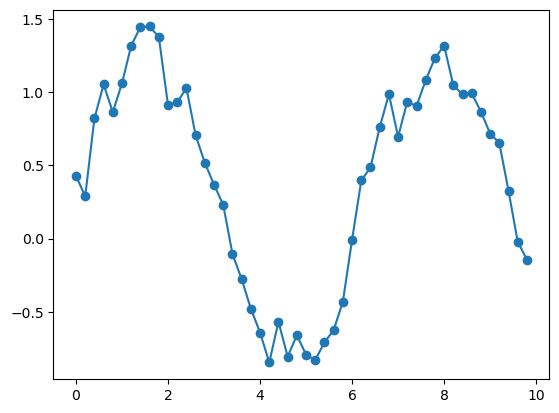

In [59]:
# For the example, we generate a dummy time series
t = np.arange(0,10,0.2)
s = np.sin(t) + np.random.random(len(t))/2 # The signal is a sinus with some random noise
plt.plot(t, s, marker = 'o')

In [73]:
# From this time series, we can create a DataArray, the fundamental xarray object
da = xr.DataArray(s, dims = ('t'), coords = {'t':t})
# Visualize the object
da

<xarray.DataArray (t: 50)> Size: 400B
array([ 0.42758032,  0.28957686,  0.82056595,  1.05298973,  0.86351153,
        1.06134637,  1.31854647,  1.44507507,  1.44882472,  1.3766682 ,
        0.91047983,  0.93083269,  1.02828361,  0.70487793,  0.5172378 ,
        0.36816261,  0.22973959, -0.10522206, -0.27735544, -0.47888108,
       -0.64195734, -0.84632198, -0.5685007 , -0.8066594 , -0.65929483,
       -0.79388349, -0.82926987, -0.70889917, -0.62425486, -0.43155233,
       -0.00701709,  0.39675479,  0.48601053,  0.75968779,  0.98637156,
        0.69560671,  0.93573589,  0.90432676,  1.08216366,  1.23247344,
        1.31844424,  1.04745019,  0.98494775,  0.99176661,  0.86713191,
        0.71754288,  0.65282024,  0.32592103, -0.02189326, -0.14363678])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8

In [74]:
# You can see that the DataArray contains the values of the time series as an array, but also embed the coordinate values of t. 
# You can access each indivually as numpy arrays
print(da.values) # Values of the variables
print("")
print(da.t.values) # Values of the t coordinate

[ 0.42758032  0.28957686  0.82056595  1.05298973  0.86351153  1.06134637
  1.31854647  1.44507507  1.44882472  1.3766682   0.91047983  0.93083269
  1.02828361  0.70487793  0.5172378   0.36816261  0.22973959 -0.10522206
 -0.27735544 -0.47888108 -0.64195734 -0.84632198 -0.5685007  -0.8066594
 -0.65929483 -0.79388349 -0.82926987 -0.70889917 -0.62425486 -0.43155233
 -0.00701709  0.39675479  0.48601053  0.75968779  0.98637156  0.69560671
  0.93573589  0.90432676  1.08216366  1.23247344  1.31844424  1.04745019
  0.98494775  0.99176661  0.86713191  0.71754288  0.65282024  0.32592103
 -0.02189326 -0.14363678]

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]


In [75]:
# Other attributes
print(da.coords) # Only the coordinates
print("")
print(da.dims) # Show the dimensions

Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8

('t',)


In [76]:
# Attributes are informative metadata. Here, they are empty for the moment
print(da.attrs) # Display attributes
# But we can add a unit
da.attrs["units"] = "m"
# Visualise the array with units
print(da.attrs)

{}
{'units': 'm'}


#### Dataset

In [81]:
# An xarray dataset is a container of DataArray
ds = xr.Dataset({"s":da}) # Transform our DataArray into a DataSet. To do so, we need to provide a name for the variable in which the previous DataArray will be stored.
ds # Visualise the Dataset, you see s appear as a "Data variable"

<xarray.Dataset> Size: 800B
Dimensions:  (t: 50)
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Data variables:
    s        (t) float64 400B 0.4276 0.2896 0.8206 ... 0.3259 -0.02189 -0.1436

In [82]:
# You can access the DataArray object with 
ds.s

<xarray.DataArray 's' (t: 50)> Size: 400B
array([ 0.42758032,  0.28957686,  0.82056595,  1.05298973,  0.86351153,
        1.06134637,  1.31854647,  1.44507507,  1.44882472,  1.3766682 ,
        0.91047983,  0.93083269,  1.02828361,  0.70487793,  0.5172378 ,
        0.36816261,  0.22973959, -0.10522206, -0.27735544, -0.47888108,
       -0.64195734, -0.84632198, -0.5685007 , -0.8066594 , -0.65929483,
       -0.79388349, -0.82926987, -0.70889917, -0.62425486, -0.43155233,
       -0.00701709,  0.39675479,  0.48601053,  0.75968779,  0.98637156,
        0.69560671,  0.93573589,  0.90432676,  1.08216366,  1.23247344,
        1.31844424,  1.04745019,  0.98494775,  0.99176661,  0.86713191,
        0.71754288,  0.65282024,  0.32592103, -0.02189326, -0.14363678])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Attributes:
    units:    m

In [91]:
# You can add other DataArrays as variables in the dataset
# Let us create another dummy time series and transform it into a DataArray
c = np.cos(t) + np.random.random(len(t))/3
da2 = xr.DataArray(c, dims = ('t'), coords = {'t':t})
da2

<xarray.DataArray (t: 50)> Size: 400B
array([ 1.32271393,  1.15483257,  1.06998101,  0.94290253,  0.94262183,
        0.64723615,  0.45911886,  0.17020344,  0.24233553,  0.01547299,
       -0.41194048, -0.48577708, -0.7185048 , -0.85036263, -0.84272208,
       -0.66534365, -0.86316141, -0.83445977, -0.76486548, -0.58442415,
       -0.42929139, -0.44309362, -0.12211546,  0.13468157,  0.38602696,
        0.57032277,  0.78612287,  0.89205923,  0.84756015,  1.15560492,
        1.10411258,  1.0199268 ,  1.22731267,  0.99864028,  0.90560877,
        0.80295607,  0.91841215,  0.51120412,  0.3596779 ,  0.09009917,
        0.17700459, -0.0480696 , -0.40371006, -0.53652469, -0.64660898,
       -0.8526249 , -0.87303422, -0.74870602, -0.87496836, -0.8015397 ])
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8

In [92]:
# Add it as a variable in the dataset
ds['c'] = da2
ds # You see now there are two variables: s and c

<xarray.Dataset> Size: 1kB
Dimensions:  (t: 50)
Coordinates:
  * t        (t) float64 400B 0.0 0.2 0.4 0.6 0.8 1.0 ... 9.0 9.2 9.4 9.6 9.8
Data variables:
    s        (t) float64 400B 0.4276 0.2896 0.8206 ... 0.3259 -0.02189 -0.1436
    c        (t) float64 400B 1.323 1.155 1.07 0.9429 ... -0.7487 -0.875 -0.8015

### Opening NetCDF files

In [24]:
# To open a NetCDF file, use the open_dataset function
tg = xr.open_dataset("../data_samples/netcdf/E-OBS/tg_ens_mean_0.25deg_reg_v29.0e.nc")
# Task: Open the other two files
pp = xr.open_dataset("../data_samples/netcdf/E-OBS/pp_ens_mean_0.25deg_reg_v29.0e.nc")
rr = xr.open_dataset("../data_samples/netcdf/E-OBS/rr_ens_mean_0.25deg_reg_v29.0e.nc")

In [28]:
# Each file is opened as a Dataset (even if they contain only one variable).
# Task: Visualise the content of each dataset. 
# Take your time to associate it with what you've explored in the terminal.
tg

<xarray.Dataset> Size: 331MB
Dimensions:    (time: 888, bnds: 2, longitude: 464, latitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 14kB 1950-01-01 ... 2023-12-31
    tg         (time, latitude, longitude) float32 331MB ...
Attributes:
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.4
    E-OBS_version:  29.0e
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Tue Aug 06 15:05:25 2024: cdo monmean daily/tg_ens_mean_0...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....
    frequency:      mon
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

In [95]:
# You can merge variables from different files into a single dataset:
ds = xr.merge([tg, pp, rr])
ds

<xarray.Dataset> Size: 994MB
Dimensions:    (time: 888, bnds: 2, longitude: 464, latitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 14kB 1950-01-01 ... 2023-12-31
    tg         (time, latitude, longitude) float32 331MB ...
    pp         (time, latitude, longitude) float32 331MB ...
    rr         (time, latitude, longitude) float32 331MB ...
Attributes:
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.4
    E-OBS_version:  29.0e
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Tue Aug 06 15:05:25 2024: cdo monmean daily/tg_ens_mean_0...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....
    frequency:      mon
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

In [100]:
# When you open a dataset with xarray, the data is loaded in memory only once you need it.
# However, you can force it to load:
ds.load()
# You usually will not want to do it. 
#Here, we do it only so that the values in the following section display.

<xarray.Dataset> Size: 994MB
Dimensions:    (time: 888, bnds: 2, longitude: 464, latitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 14kB 1950-01-01 ... 2023-12-31
    tg         (time, latitude, longitude) float32 331MB nan nan nan ... nan nan
    pp         (time, latitude, longitude) float32 331MB nan nan nan ... nan nan
    rr         (time, latitude, longitude) float32 331MB nan nan nan ... nan nan
Attributes:
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.4
    E-OBS_version:  29.0e
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Tue Aug 06 15:05:25 2024: cdo monmean daily/tg_ens_mean_0...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....
    frequency:      mon
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

### Indexing
How to access specific values in our dataset?

In [113]:
# Method 1: Not recommended, use integer indexing as in numpy
ds.pp[10,100,200] # Access the value of pp for the 10th time step, 100th latitude and 200th longitude

<xarray.DataArray 'pp' ()> Size: 4B
array(1008.44336, dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 1950-11-15
    longitude  float64 8B 9.625
    latitude   float64 8B 50.38
Attributes:
    standard_name:  air_pressure_at_sea_level
    long_name:      sea level pressure
    units:          hPa
    cell_methods:   time: mean

In [115]:
# Method 2: Using xarray's isel method to index values with coordinate names
ds.pp.isel(time = 10, latitude = 100, longitude = 200)

<xarray.DataArray 'pp' ()> Size: 4B
array(1008.44336, dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 1950-11-15
    longitude  float64 8B 9.625
    latitude   float64 8B 50.38
Attributes:
    standard_name:  air_pressure_at_sea_level
    long_name:      sea level pressure
    units:          hPa
    cell_methods:   time: mean

In [124]:
# Method 3 (generally recommended): Using xarray's sel method to index by value
# Get the values of pp for the month of January 2002, at the coordinates 42.375°N 0.375°E
ds.pp.sel(time = "2002-01-16", latitude = 42.375, longitude = 0.375) 

<xarray.DataArray 'pp' ()> Size: 4B
array(1027.0387, dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2002-01-16
    longitude  float64 8B 0.375
    latitude   float64 8B 42.38
Attributes:
    standard_name:  air_pressure_at_sea_level
    long_name:      sea level pressure
    units:          hPa
    cell_methods:   time: mean

In [143]:
# If you want the closest point to a given set of coordinates, use the argument method="nearest"
# Task: Select the temperature time series at the closest point to you favourite town
T_Paris = ds.tg.sel(latitude = 48.8575, longitude = 2.3514, method = "nearest")
T_Paris

<xarray.DataArray 'tg' (time: 888)> Size: 4kB
array([275.61514, 280.33643, 281.2287 , 282.35165, 287.97678, 292.65167,
       293.1555 , 291.39645, 287.70267, 283.9529 , 280.522  , 273.69904,
       278.47614, 277.89178, 279.3016 , 282.374  , 285.71613, 289.32898,
       291.68063, 290.33646, 289.634  , 283.4371 , 282.24634, 277.58356,
       276.32452, 275.96033, 281.3671 , 285.28   , 288.47162, 290.60434,
       293.3513 , 292.03482, 285.68365, 283.57837, 277.72266, 276.3455 ,
       273.55515, 276.57108, 281.28806, 283.827  , 288.34323, 289.03467,
       291.17517, 292.049  , 289.38034, 285.29935, 279.234  , 279.9626 ,
       274.19742, 274.83322, 281.32773, 282.03165, 286.63773, 289.359  ,
       289.69644, 290.37097, 288.31567, 286.16   , 280.81067, 279.60516,
       276.95386, 276.625  , 277.36322, 283.827  , 285.6361 , 289.76965,
       292.6284 , 292.20322, 288.69666, 283.18677, 280.02066, 279.5    ,
       277.25903, 269.02344, 280.61063, 281.54065, 287.68677, 287.31198,
       291.10355, 289.0187 , 290.15033, 283.92966, 278.44565, 279.22546,
       276.26257, 280.6357 , 283.59   , 283.05032, 284.71323, 290.998  ,
       292.42484, 290.44547, 288.093  , 284.65128, 279.81067, 276.59323,
       277.2129 , 279.37286, 277.90192, 281.47232, 287.36774, 288.96432,
       291.34613, 291.54193, 290.39233, 284.80322, 279.21033, 278.5142 ,
       276.1442 , 277.01108, 281.96   , 284.104  , 287.97   , 290.96133,
       294.15   , 292.64807, 291.275  , 285.98065, 280.11667, 279.33612,
...
       293.41162, 291.04935, 291.08133, 287.8616 , 283.34766, 278.66934,
       277.95193, 277.43463, 281.43063, 285.35468, 287.48257, 291.869  ,
       294.5629 , 294.22968, 288.096  , 284.74387, 284.17432, 282.81805,
       278.9087 , 279.54932, 280.13968, 283.18332, 287.67355, 290.95532,
       293.57968, 294.23773, 292.12567, 284.7942 , 281.06067, 277.75482,
       275.36322, 280.62607, 283.75967, 283.67865, 289.3858 , 293.63998,
       294.01385, 292.85968, 288.667  , 287.2932 , 281.01334, 278.71127,
       280.8729 , 275.02356, 280.36548, 286.727  , 289.51547, 292.40298,
       296.57742, 294.22482, 290.15   , 287.00998, 281.23767, 280.14224,
       277.43323, 280.6682 , 282.77258, 284.63666, 286.52127, 292.78998,
       294.92773, 293.85065, 290.25766, 286.61258, 281.298  , 280.07227,
       279.59128, 282.11688, 281.77838, 287.46967, 288.70322, 291.63565,
       293.45288, 295.40677, 291.79767, 285.83386, 282.90732, 279.88742,
       277.95065, 280.0493 , 281.7661 , 282.70633, 286.33224, 293.03632,
       293.24097, 292.34033, 291.90433, 285.9432 , 280.314  , 280.22128,
       278.26807, 280.9982 , 283.12677, 284.697  , 290.25162, 293.31067,
       295.74033, 296.08096, 290.319  , 289.20773, 283.09567, 278.3958 ,
       279.43903, 280.05606, 282.77063, 284.05865, 288.55063, 294.79865,
       294.1516 , 293.59903, 294.19366, 288.53613, 282.64566, 280.97128],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
    longitude  float64 8B 2.375
    latitude   float64 8B 48.88
Attributes:
    units:    K

In [144]:
# You can also select a range of values instead of just points, using slice.
# Example: Temperature over France
T_France = ds.tg.sel(longitude = slice(-4.7,7.8), latitude = slice(42.5,51.0))
T_France

<xarray.DataArray 'tg' (time: 888, latitude: 34, longitude: 50)> Size: 6MB
array([[[275.54355, 275.87387, 275.67676, ...,       nan,       nan,
               nan],
        [274.32   , 275.01968, 275.72388, ...,       nan,       nan,
               nan],
        [275.5161 , 276.5    , 277.63998, ...,       nan,       nan,
               nan],
        ...,
        [279.78   , 279.73935,       nan, ..., 272.39288, 273.04675,
         272.74677],
        [279.25967, 279.34677, 278.8058 , ..., 273.86774, 273.34933,
         272.84418],
        [      nan, 279.2587 , 279.16452, ..., 274.56064, 273.7716 ,
         273.28256]],

       [[278.03357, 278.4489 , 278.23322, ...,       nan,       nan,
               nan],
        [276.28357, 277.1932 , 278.1257 , ...,       nan,       nan,
               nan],
        [277.55963, 278.78857, 280.21964, ...,       nan,       nan,
               nan],
...
        [282.67465, 282.52332,       nan, ..., 278.771  , 280.11533,
         279.7213 ],
        [282.247  , 282.25598, 281.57498, ..., 280.47766, 279.92398,
         279.27866],
        [      nan, 282.405  , 282.15298, ..., 280.74432, 279.88565,
         279.19067]],

       [[277.68774, 278.12515, 278.06482, ...,       nan,       nan,
               nan],
        [276.7687 , 277.53162, 278.31097, ...,       nan,       nan,
               nan],
        [278.18774, 279.21805, 280.3487 , ...,       nan,       nan,
               nan],
        ...,
        [282.47678, 282.4258 ,       nan, ..., 277.38934, 278.50546,
         278.1516 ],
        [282.06516, 282.16064, 281.62097, ..., 279.15387, 278.57227,
         277.90805],
        [      nan, 282.25613, 282.0571 , ..., 279.5684 , 278.63742,
         277.8974 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
  * longitude  (longitude) float64 400B -4.625 -4.375 -4.125 ... 7.375 7.625
  * latitude   (latitude) float64 272B 42.62 42.88 43.12 ... 50.38 50.62 50.88
Attributes:
    units:    K

### Computation
You can perform many operations directly on the DataArrays

#### Arithmetics

In [135]:
# Example: Add a constant to transform temperature to K
T_Kelvin = ds.tg + 273.15
print(T_Kelvin)
# Notice the attributes disappeared, you can update the units
T_Kelvin.attrs["units"] = "K"
print(T_Kelvin)
# Replace the temperature in the dataset
ds["tg"] = T_Kelvin

<xarray.DataArray 'tg' (time: 888, latitude: 201, longitude: 464)> Size: 331MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
    

In [136]:
# Task: Convert the pressure to Pa
P_Pa = ds.pp * 100
P_Pa.attrs["units"] = "Pa"
ds['pp'] = P_Pa

#### Statistics
You can perform all basic statistical operations directly on the DataArrays

In [138]:
# Example: Compute the mean temperature
ds.tg.mean()

<xarray.DataArray 'tg' ()> Size: 4B
array(281.0082, dtype=float32)

In [139]:
# Task: compute the standard devation of the temperature with the std method
ds.tg.std()

<xarray.DataArray 'tg' ()> Size: 4B
array(9.771127, dtype=float32)

In [141]:
# You may apply these operations only over a subset of dimensions
# Example: Compute the mean temperature over time only
ds.tg.mean("time") # Notice the DataArray now has only longitude and latitude as coordinates

<xarray.DataArray 'tg' (latitude: 201, longitude: 464)> Size: 373kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38

In [142]:
# Task: Compute the mean over latitude and longitude areal mean temperature
ds.tg.mean(["longitude", "latitude"])

<xarray.DataArray 'tg' (time: 888)> Size: 4kB
array([266.00647, 271.21878, 274.98874, 281.098  , 285.3335 , 289.2693 ,
       291.06558, 290.1668 , 287.02463, 280.7581 , 276.3222 , 272.30243,
       269.7217 , 270.38037, 273.92328, 280.82138, 283.6742 , 289.06516,
       291.07846, 291.88525, 287.4453 , 280.39755, 276.1129 , 273.49384,
       271.5815 , 271.63165, 271.69647, 280.48657, 284.11682, 288.89276,
       291.6164 , 290.9691 , 286.11273, 280.9599 , 275.35556, 272.03476,
       270.13312, 268.67712, 274.35443, 280.3654 , 285.00122, 290.43484,
       291.74573, 291.0347 , 286.17462, 282.0546 , 275.457  , 272.76892,
       267.4111 , 266.53928, 274.76038, 278.23447, 285.6208 , 289.95242,
       291.77246, 290.87103, 287.2488 , 281.7073 , 276.28305, 274.21695,
       271.42834, 270.82565, 272.52686, 277.86838, 283.7956 , 288.0667 ,
       291.559  , 290.9579 , 287.34433, 281.9534 , 275.05338, 269.75113,
       269.6626 , 264.4697 , 272.58975, 277.6414 , 284.28122, 289.24152,
       290.02826, 289.33237, 285.385  , 280.50278, 272.7741 , 272.06552,
       270.67062, 273.47723, 273.6231 , 279.6732 , 284.1437 , 288.62576,
       291.7989 , 290.5654 , 286.3624 , 281.41248, 276.351  , 272.07248,
       269.94507, 271.35886, 271.84668, 277.90247, 285.11105, 287.97388,
       290.54175, 290.34152, 286.0295 , 281.5019 , 276.88623, 271.60028,
       270.9473 , 271.6626 , 275.83322, 279.68488, 284.77942, 289.11768,
       292.27087, 290.70844, 284.95633, 279.9174 , 275.22626, 271.441  ,
...
       293.31607, 292.0179 , 287.85413, 282.00208, 277.35208, 273.93204,
       272.20053, 273.6267 , 277.38626, 280.75772, 286.25516, 289.8388 ,
       292.33884, 292.4983 , 288.69485, 281.78293, 278.48135, 275.65906,
       269.62747, 275.52695, 276.83072, 281.90796, 286.69498, 290.6242 ,
       293.23422, 292.24368, 288.14954, 281.6848 , 275.86005, 273.18607,
       270.57507, 272.97302, 277.86328, 280.1419 , 285.42416, 290.15048,
       292.53665, 292.4762 , 287.8467 , 282.5667 , 277.05054, 274.88446,
       273.03775, 270.71658, 273.80115, 282.56754, 288.2793 , 290.4546 ,
       294.1073 , 292.86926, 288.79007, 283.09766, 277.54004, 273.5177 ,
       270.78387, 274.32788, 276.81763, 281.35812, 285.96497, 291.80807,
       292.09317, 292.06302, 287.7474 , 283.13855, 277.88007, 276.0619 ,
       274.56958, 275.58548, 277.88528, 280.98935, 285.36496, 291.36984,
       292.64597, 292.5154 , 289.2829 , 284.21616, 278.6219 , 274.64252,
       271.53378, 271.61664, 275.7617 , 280.10257, 285.28305, 291.42838,
       293.7283 , 291.61334, 286.89758, 282.25787, 277.46027, 272.59903,
       272.3802 , 274.56918, 275.55518, 280.41388, 285.7066 , 291.19745,
       293.20358, 293.67444, 287.00864, 284.03235, 278.1713 , 273.9525 ,
       273.9834 , 273.57266, 276.50052, 280.93973, 285.88986, 290.765  ,
       292.7116 , 293.3264 , 290.04126, 283.1025 , 277.1077 , 274.0666 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16

In [148]:
# NB: When you average data over space, remember to always be careful about the curvature of the Earth. 
# To account for it, and get a real areal mean, use a weighted mean
lat_rad = np.deg2rad(ds.latitude) # Get latitude in radians
ds.tg.weighted(np.cos(lat_rad)).mean(["latitude", "longitude"]) # Apply weights corresponding to the cosinus of the latitude before the mean

<xarray.DataArray 'tg' (time: 888)> Size: 7kB
array([267.15187411, 272.27781075, 276.06107658, 281.97498866,
       286.3057926 , 290.12225972, 292.08490804, 290.94882033,
       288.10136939, 281.52549016, 277.45857933, 273.36710705,
       271.15772166, 271.66857781, 275.43462003, 281.89168658,
       284.81365851, 290.04776888, 292.08791556, 292.70591667,
       288.50716075, 281.20555472, 277.43999796, 274.340616  ,
       272.52273485, 272.71821874, 273.21533815, 281.58642474,
       285.1952507 , 289.74197932, 292.51381272, 292.17741261,
       287.37695085, 282.41197261, 276.59497003, 273.35784972,
       271.2946564 , 270.25250084, 275.21132507, 281.34967294,
       285.9989994 , 290.95083294, 292.63494412, 291.96770393,
       287.33201448, 283.07748681, 276.29858906, 273.40553254,
       268.31939599, 267.79426371, 275.85421032, 279.21453401,
       286.44739395, 290.84709162, 292.48428023, 291.85215458,
       288.3592836 , 282.93706976, 277.54101995, 275.08889236,
       272.80636944, 272.53174728, 273.96367476, 279.1189274 ,
       284.96496482, 289.11713305, 292.36047351, 291.72546528,
       288.26338262, 283.1759069 , 276.37924614, 271.68776281,
       271.07870972, 265.86710682, 273.56582349, 278.9142462 ,
       285.10362339, 289.86228363, 290.88900979, 290.43310284,
...
       286.6386316 , 291.30341664, 293.56073966, 293.59173325,
       289.0088657 , 283.78141523, 278.16514911, 276.00907501,
       274.26752844, 272.29641021, 275.52290544, 283.80034079,
       289.04842753, 291.42177532, 294.70942418, 293.85352952,
       289.90416524, 284.35098999, 278.54201194, 274.6963713 ,
       272.12888945, 275.51342128, 278.02813102, 282.23387179,
       287.00557118, 292.79393333, 293.13754206, 293.18846008,
       288.93884794, 284.63114168, 279.28853966, 277.0736072 ,
       275.43249883, 276.6982483 , 279.03408876, 282.14000868,
       286.52063411, 292.03509904, 293.67575244, 293.56456832,
       290.50594487, 285.39245303, 279.46737721, 275.56436568,
       272.88706722, 273.25770664, 276.8086641 , 281.08205877,
       286.28422766, 292.071014  , 294.47045935, 292.66274391,
       288.04894445, 283.27629203, 278.64695139, 273.9858169 ,
       273.39347554, 275.76317716, 276.38699715, 281.50702608,
       286.68283356, 292.03910026, 294.02090668, 294.55693612,
       288.15414249, 285.17279166, 279.30872269, 275.31302517,
       274.98230591, 274.51185926, 277.97417129, 281.89474336,
       286.66308839, 291.56340631, 293.6733602 , 294.25005014,
       290.96132102, 284.59034009, 278.61899527, 275.51749083])
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16

#### Applying numpy functions

In [149]:
# You can apply numpy function directly to the DataArrays
# Example: Get the square root of the precipitation (This is for the sake of the exercise, it has no physical sense of course...)
np.sqrt(ds.rr)

<xarray.DataArray 'rr' (time: 888, latitude: 201, longitude: 464)> Size: 331MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1950-01-16 1950-02-14 ... 2023-12-16
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Attributes:
    standard_name:  thickness_of_rainfall_amount
    long_name:      rainfall
    units:          mm
    cell_methods:   time: mean

### Plotting
xarray embeds a smart plotting function, as long as you provide it one- or two-dimensional data (beyond, it will plot a histogram).

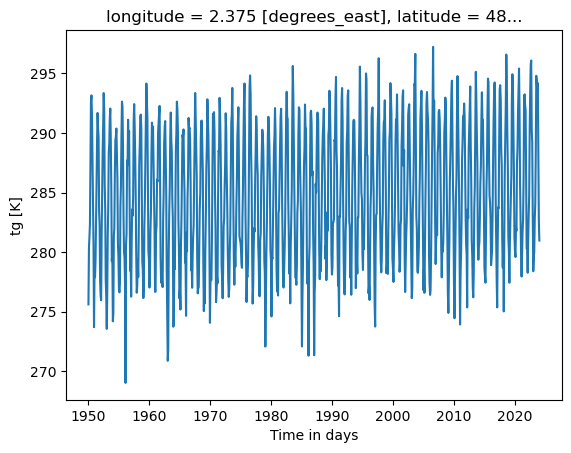

In [150]:
# Plot the Paris temperature time series
T_Paris.plot()

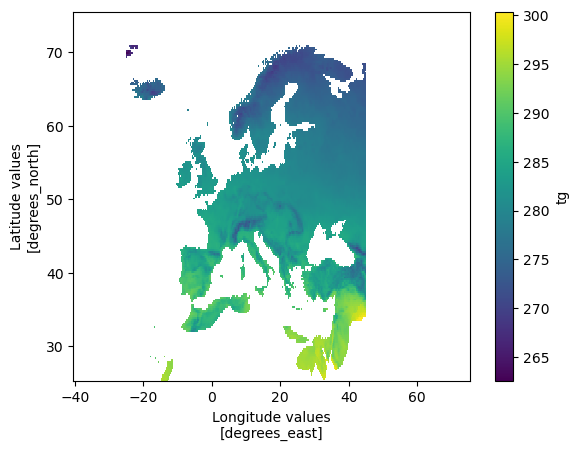

In [152]:
# Plot the mean temperature over Europe
ds.tg.mean("time").plot()